# IMPORT ALL REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

## PROBLEM STATEMENT

In [2]:
# CUSTOMER LIST DEPEND ON DATA

## DATA GATHERING

In [3]:
df=pd.read_csv(r"bank_data.csv")
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:>

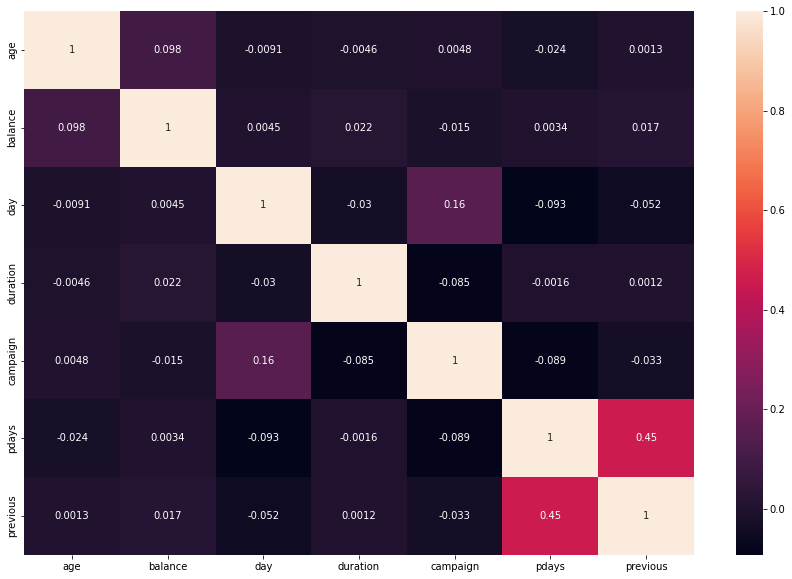

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [6]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [7]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [8]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [9]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
df['education'].replace({"unknown":0,"primary":1,"secondary":2,"tertiary":3},inplace=True)
df['default'].replace({"no":0,"yes":1},inplace=True)
df['housing'].replace({"no":0,"yes":1},inplace=True)
df['loan'].replace({"no":0,"yes":1},inplace=True)
df['y'].replace({"no":0,"yes":1},inplace=True)

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,1,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,2,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,2,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [12]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df=pd.get_dummies(df,columns=["marital"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               45211 non-null  object
 2   education         45211 non-null  int64 
 3   default           45211 non-null  int64 
 4   balance           45211 non-null  int64 
 5   housing           45211 non-null  int64 
 6   loan              45211 non-null  int64 
 7   contact           45211 non-null  object
 8   day               45211 non-null  int64 
 9   month             45211 non-null  object
 10  duration          45211 non-null  int64 
 11  campaign          45211 non-null  int64 
 12  pdays             45211 non-null  int64 
 13  previous          45211 non-null  int64 
 14  poutcome          45211 non-null  object
 15  y                 45211 non-null  int64 
 16  marital_divorced  45211 non-null  uint8 
 17  marital_marr

In [15]:
df

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single
0,58,management,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,0,1,0
1,44,technician,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,0,0,1
2,33,entrepreneur,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,0,1,0
3,47,blue-collar,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,0,1,0
4,33,unknown,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,3,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,0,1,0
45207,71,retired,1,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,1,0,0
45208,72,retired,2,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,0,1,0
45209,57,blue-collar,2,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,0,1,0


In [16]:
df.drop(["contact","day","month"],axis=1,inplace=True)

In [17]:
df

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single
0,58,management,3,0,2143,1,0,261,1,-1,0,unknown,0,0,1,0
1,44,technician,2,0,29,1,0,151,1,-1,0,unknown,0,0,0,1
2,33,entrepreneur,2,0,2,1,1,76,1,-1,0,unknown,0,0,1,0
3,47,blue-collar,0,0,1506,1,0,92,1,-1,0,unknown,0,0,1,0
4,33,unknown,0,0,1,0,0,198,1,-1,0,unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,3,0,825,0,0,977,3,-1,0,unknown,1,0,1,0
45207,71,retired,1,0,1729,0,0,456,2,-1,0,unknown,1,1,0,0
45208,72,retired,2,0,5715,0,0,1127,5,184,3,success,1,0,1,0
45209,57,blue-collar,2,0,668,0,0,508,4,-1,0,unknown,0,0,1,0


In [18]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
df=pd.get_dummies(df,columns=["job"])

In [20]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
df=pd.get_dummies(df,columns=["poutcome"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   duration           45211 non-null  int64
 7   campaign           45211 non-null  int64
 8   pdays              45211 non-null  int64
 9   previous           45211 non-null  int64
 10  y                  45211 non-null  int64
 11  marital_divorced   45211 non-null  uint8
 12  marital_married    45211 non-null  uint8
 13  marital_single     45211 non-null  uint8
 14  job_admin.         45211 non-null  uint8
 15  job_blue-collar    45211 non-null  uint8
 16  job_entrepreneur   45211 non-null  uint8
 17  job_housemai

## Model Training

In [23]:
x=df.drop("y",axis=1)
y=df["y"]

In [24]:
smt=SMOTE(sampling_strategy=0.80,random_state=5,k_neighbors=3)
x_smt,y_smt=smt.fit_resample(x,y)

In [25]:
y_smt.value_counts()

0    39922
1    31937
Name: y, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_smt,y_smt,train_size=0.75)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((53894, 29), (17965, 29), (53894,), (17965,))

In [28]:
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
hyp={"n_estimators":np.arange(1,10),"criterion":["gini","entropy"],"max_depth":np.arange(1,18),"min_samples_split":np.arange(1,5),"min_samples_leaf":np.arange(1,2)}
rmcv=RandomizedSearchCV(rfr,hyp,cv=5)
rmcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                                        'min_samples_leaf': array([1]),
                                        'min_samples_split': array([1, 2, 3, 4]),
                                        'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [49]:
rmcv.best_params_

{'n_estimators': 8,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 15,
 'criterion': 'entropy'}

In [58]:
rfr_hyp=RandomForestClassifier(n_estimators=10,min_samples_split=2,min_samples_leaf=1,max_depth=15,criterion="entropy")
rfr_hyp.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=10)

## Model Evaluation

In [59]:
def result(model,x_act,y_act):
    pred=model.predict(x_act)
    cm=confusion_matrix(y_act,pred)
    print(f"Confusion matrix =\n {cm}")
    cr=classification_report(y_act,pred)
    print(f"Classification Report =\n {cr}")
    acc=accuracy_score(y_act,pred)
    print(f"Accuracy Score = {acc}")

In [60]:
result(rfr_hyp,x_train,y_train)

Confusion matrix =
 [[28886  1032]
 [ 1474 22502]]
Classification Report =
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     29918
           1       0.96      0.94      0.95     23976

    accuracy                           0.95     53894
   macro avg       0.95      0.95      0.95     53894
weighted avg       0.95      0.95      0.95     53894

Accuracy Score = 0.9535013174008239


In [61]:
result(rfr_hyp,x_test,y_test)

Confusion matrix =
 [[9377  627]
 [ 822 7139]]
Classification Report =
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     10004
           1       0.92      0.90      0.91      7961

    accuracy                           0.92     17965
   macro avg       0.92      0.92      0.92     17965
weighted avg       0.92      0.92      0.92     17965

Accuracy Score = 0.9193431672696911


In [76]:
import json
js=x.columns
jsn={"columns":list(js)}

In [77]:
with open("columns_list.json","w") as f:
    json.dump(jsn,f)

In [74]:
import pickle
with open("bank_project.pickle","wb") as f:
    pickle.dump(rfr_hyp,f)

## NOTE

In [35]:
# Training Accuracy Score is 95.35% & Testing Accuracy Score is 91.93%
# Hence this model High Bias & Low Variance